In [ ]:
# Script para instalar todas as bibliotecas necessárias -> para outros casos de ml usando R

pacotes_necessarios <- c("readr", "dplyr", "ggplot2", "xgboost",
                         "caret", "text2vec", "gridExtra", "scales")


instalar_pacotes <- function(pacotes) {
  pacotes_nao_instalados <- pacotes[!(pacotes %in% installed.packages()[,"Package"])]
  if(length(pacotes_nao_instalados) > 0) {
    cat("Instalando os seguintes pacotes:", pacotes_nao_instalados, "\n")
    install.packages(pacotes_nao_instalados, dependencies = TRUE)
  } else {
    cat("Todos os pacotes já estão instalados.\n")
  }
}


instalar_pacotes(pacotes_necessarios)


pacotes_instalados <- pacotes_necessarios %in% installed.packages()[,"Package"]
if(all(pacotes_instalados)) {
  cat("Todos os pacotes foram instalados com sucesso!\n")
} else {
  cat("Atenção: Os seguintes pacotes não foram instalados corretamente:\n")
  cat(pacotes_necessarios[!pacotes_instalados], sep = ", ")
  cat("\n")
}

Instalando os seguintes pacotes: caret text2vec gridExtra 


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘R.methodsS3’, ‘R.oo’, ‘R.utils’, ‘bitops’, ‘Rdpack’, ‘R.cache’, ‘caTools’, ‘TH.data’, ‘profileModel’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘lazyeval’, ‘plotrix’, ‘styler’, ‘classInt’, ‘labelled’, ‘gplots’, ‘libcoin’, ‘matrixStats’, ‘multcomp’, ‘brglm’, ‘gtools’, ‘lme4’, ‘qvcalc’, ‘rex’, ‘Formula’, ‘plotmo’, ‘combinat’, ‘questionr’, ‘ROCR’, ‘mvtnorm’, ‘modeltools’, ‘strucchange’, ‘coin’, ‘zoo’, ‘sandwich’, ‘ROSE’, ‘MatrixExtra’, ‘float’, ‘RhpcBLASctl’, ‘RcppArmadillo’, ‘RcppEigen’, ‘e1071’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘reshape2’, ‘BradleyTerry2’, ‘covr’, ‘Cubist’, ‘earth’, ‘ellipse’, ‘fastICA’, ‘gam’, ‘kernlab’, ‘klaR’, ‘mda’, ‘mlbench’, ‘MLmetrics’, ‘pamr’, ‘party’, ‘pls’, ‘proxy’, ‘randomForest’, ‘RANN’, ‘spls’, ‘superpc’, ‘themis’, ‘rsparse’, ‘mlapi’, ‘lgr’, ‘udpipe’, ‘glmnet’, ‘egg’




Todos os pacotes foram instalados com sucesso!


In [ ]:
# Carregando bibliotecas necessárias
library(readr)        # Para leitura de arquivos
library(dplyr)        # Para manipulação de dados
library(ggplot2)      # Para visualização
library(xgboost)      # Para o modelo XGBoost
library(caret)        # Para validação cruzada e separação de dados
library(text2vec)     # Para processamento de texto (TF-IDF)
library(gridExtra)    # Para organizar múltiplos gráficos
library(scales)       # Para formatação de escalas em gráficos


In [ ]:
df <- read_csv("Social Media Engagement Dataset.csv")

Rows: 12000 Columns: 28
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (17): post_id, day_of_week, platform, user_id, location, language, text...
dbl  (10): sentiment_score, toxicity_score, likes_count, shares_count, comme...
dttm  (1): timestamp

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:

# Explorando os dados
glimpse(df)

# Valores ausentes
missing <- sort(colSums(is.na(df)), decreasing = TRUE)
print(missing[missing > 0])

# Estatísticas descritivas
summary(df)

# Ver a distribuição da plataforma
table(df$platform)

# Ver a distribuição por dia da semana
table(df$day_of_week)

Rows: 12,000
Columns: 28
$ post_id                 <chr> "kcqbs6hxybia", "vkmervg4ioos", "memhx4o1x6yu"…
$ timestamp               <dttm> 2024-12-09 11:26:15, 2024-07-28 19:59:26, 202…
$ day_of_week             <chr> "Monday", "Sunday", "Saturday", "Monday", "Thu…
$ platform                <chr> "Instagram", "Twitter", "Reddit", "YouTube", "…
$ user_id                 <chr> "user_52nwb0a6", "user_ucryct98", "user_7rrev1…
$ location                <chr> "Melbourne, Australia", "Tokyo, Japan", "Beiji…
$ language                <chr> "pt", "ru", "ru", "en", "hi", "pt", "ja", "es"…
$ text_content            <chr> "Just tried the Chromebook from Google. Best p…
$ hashtags                <chr> "#Food", "#MustHave, #Food", "#Promo, #Food, #…
$ mentions                <chr> NA, "@CustomerService, @BrandCEO", NA, "@Style…
$ keywords                <chr> "price, unique, traditional, efficient", "deli…
$ topic_category          <chr> "Pricing", "Delivery", "Product", "Delivery", …
$ sentiment_sco

   post_id            timestamp                   day_of_week       
 Length:12000       Min.   :2024-05-01 01:04:04   Length:12000      
 Class :character   1st Qu.:2024-07-31 17:31:49   Class :character  
 Mode  :character   Median :2024-10-31 03:49:36   Mode  :character  
                    Mean   :2024-10-30 09:11:56                     
                    3rd Qu.:2025-01-28 13:32:56                     
                    Max.   :2025-04-30 23:46:43                     
   platform           user_id            location           language        
 Length:12000       Length:12000       Length:12000       Length:12000      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                       


 Facebook Instagram    Reddit   Twitter   YouTube 
     2431      2355      2372      2406      2436 


   Friday    Monday  Saturday    Sunday  Thursday   Tuesday Wednesday 
     1723      1720      1675      1716      1718      1677      1771 

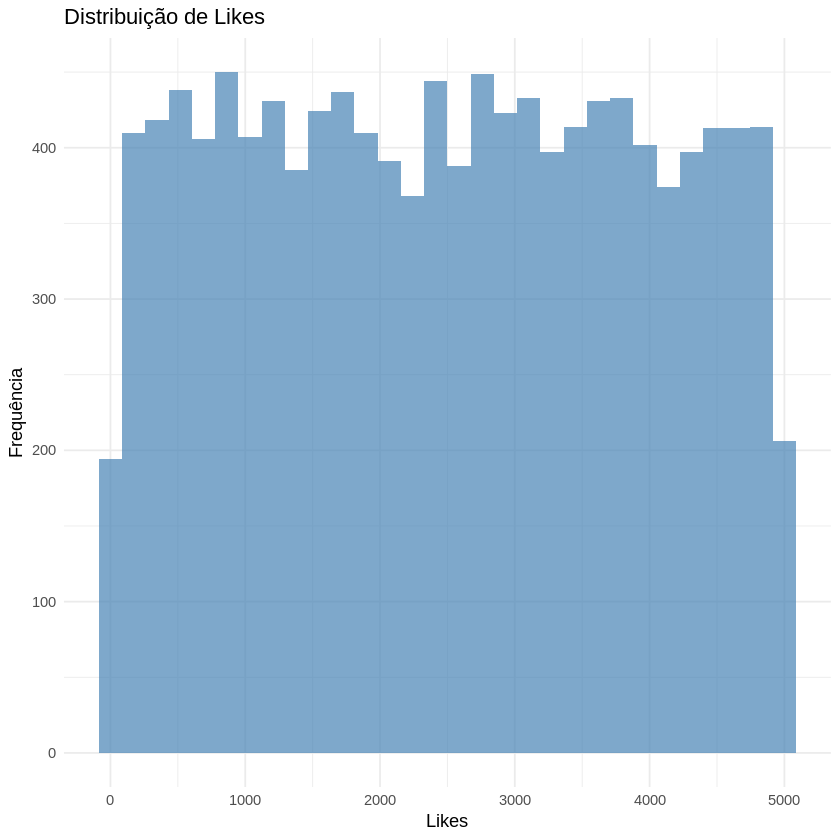

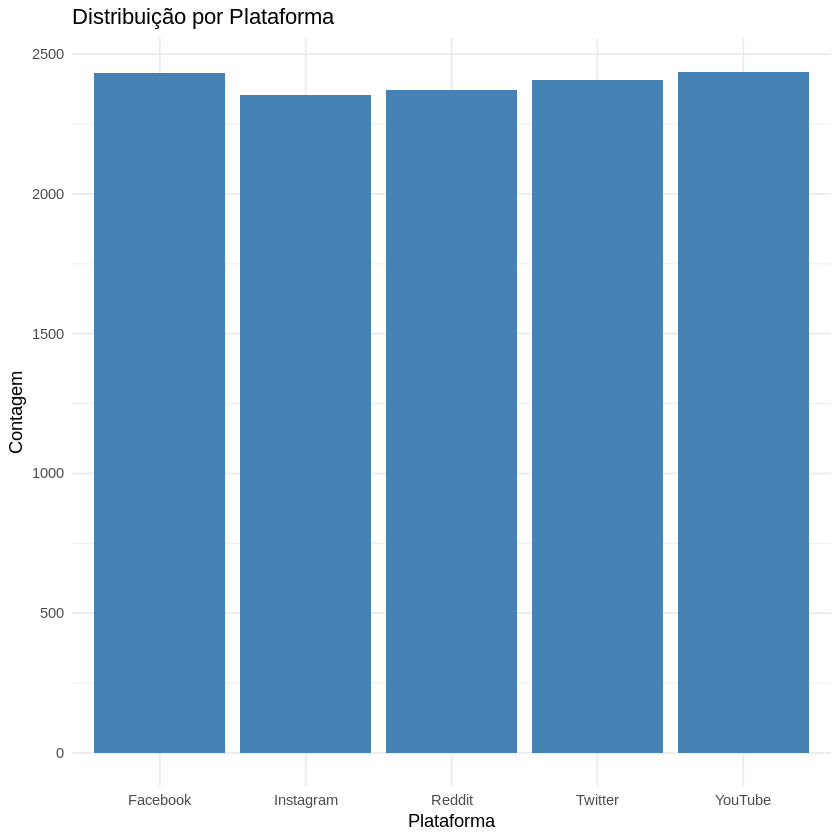

post_id,timestamp,day_of_week,platform,user_id,location,language,text_content,hashtags,mentions,⋯,comments_count,impressions,engagement_rate,brand_name,product_name,campaign_name,campaign_phase,user_past_sentiment_avg,user_engagement_growth,buzz_change_rate
<chr>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
kcqbs6hxybia,2024-12-09 11:26:15,Monday,Instagram,user_52nwb0a6,"Melbourne, Australia",pt,Just tried the Chromebook from Google. Best purchase ever. #Food Really interested in hearing your thoughts!,#Food,NA,⋯,701,18991,0.19319,Google,Chromebook,BlackFriday,Launch,0.0953,-0.3672,19.1
vkmervg4ioos,2024-07-28 19:59:26,Sunday,Twitter,user_ucryct98,"Tokyo, Japan",ru,"Just saw an ad for Microsoft Surface Laptop during the SpringBlast2025. Not worth the money. #MustHave, #Food","#MustHave, #Food","@CustomerService, @BrandCEO",⋯,359,52764,0.05086,Microsoft,Surface Laptop,PowerRelease,Post-Launch,0.1369,-0.4510,-42.6
memhx4o1x6yu,2024-11-23 14:00:12,Saturday,Reddit,user_7rrev126,"Beijing, China",ru,"What's your opinion about Nike's Epic React? #Promo, #Food, #Trending Really interested in hearing your thoughts!","#Promo, #Food, #Trending",NA,⋯,643,8887,0.45425,Nike,Epic React,BlackFriday,Post-Launch,0.2855,-0.4112,17.4
bhyo6piijqt9,2024-09-16 04:35:25,Monday,YouTube,user_4mxuq0ax,"Lagos, Nigeria",en,"Bummed out with my new Diet Pepsi from Pepsi! Disappointed with the quality. #Reviews, #Sustainable","#Reviews, #Sustainable","@StyleGuide, @BrandSupport",⋯,743,6696,0.42293,Pepsi,Diet Pepsi,LaunchWave,Launch,-0.2094,-0.0167,-5.5
c9dkiomowakt,2024-09-05 21:03:01,Thursday,Twitter,user_l1vpox2k,"Berlin, Germany",hi,"Just tried the Corolla from Toyota. Absolutely loving it. #Health, #Travel Really interested in hearing your thoughts!","#Health, #Travel","@BrandSupport, @InfluencerName",⋯,703,47315,0.08773,Toyota,Corolla,LocalTouchpoints,Launch,0.6867,0.0807,38.8
e8rzr949rzkr,2024-07-28 03:21:09,Sunday,Reddit,user_jzvf44eq,"Seoul, South Korea",pt,Nike PowerRelease is subpar! Can't wait to see what's coming next. #Discount Curious about your experience too.,#Discount,NA,⋯,441,7734,0.64908,Nike,React,CyberMonday,Pre-Launch,0.9095,-0.4563,16.0


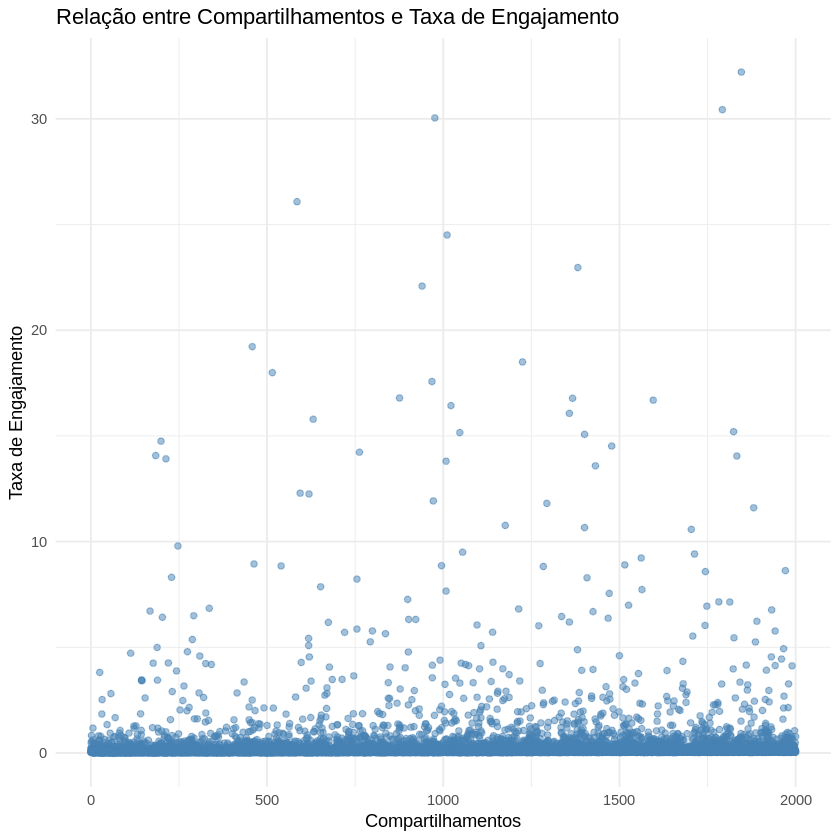

In [ ]:
# Visualizações
# Histograma de likes
ggplot(df, aes(x = likes_count)) +
  geom_histogram(bins = 30, fill = "steelblue", alpha = 0.7) +
  theme_minimal() +
  labs(title = "Distribuição de Likes", x = "Likes", y = "Frequência")

# Gráfico de barras para plataforma
ggplot(df, aes(x = platform)) +
  geom_bar(fill = "steelblue") +
  theme_minimal() +
  labs(title = "Distribuição por Plataforma", x = "Plataforma", y = "Contagem")

# Gráfico de dispersão
ggplot(df, aes(x = shares_count, y = engagement_rate)) +
  geom_point(alpha = 0.5, color = "steelblue") +
  theme_minimal() +
  labs(title = "Relação entre Compartilhamentos e Taxa de Engajamento",
       x = "Compartilhamentos", y = "Taxa de Engajamento")

# Visualizar primeiras linhas do dataset
head(df)


[04:05:18] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[04:05:18] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[04:05:26] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[04:05:26] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[04:05:35] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[04:05:35] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[04:05:40] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[04:05:40] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[04:05:48] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[04:05:48] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is dep

,y_true,y_pred,residuo,erro_rel
,<dbl>,<dbl>,<dbl>,<dbl>
1,1.05387,0.96899545,0.0848745481,0.080536070
2,0.03049,0.03323051,-0.0027405133,-0.089882366
3,0.16590,0.18487048,-0.0189704815,-0.114348894
4,0.10809,0.10638116,0.0017088444,0.015809459
5,0.04879,0.05579823,-0.0070082288,-0.143640681
6,0.08131,0.08150270,-0.0001926984,-0.002369922


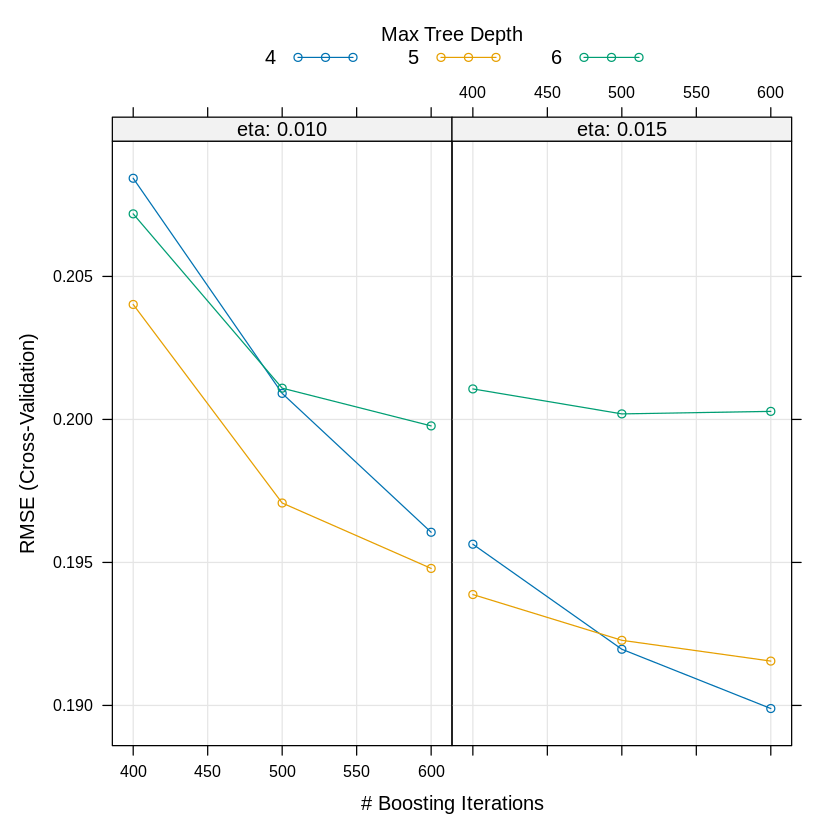

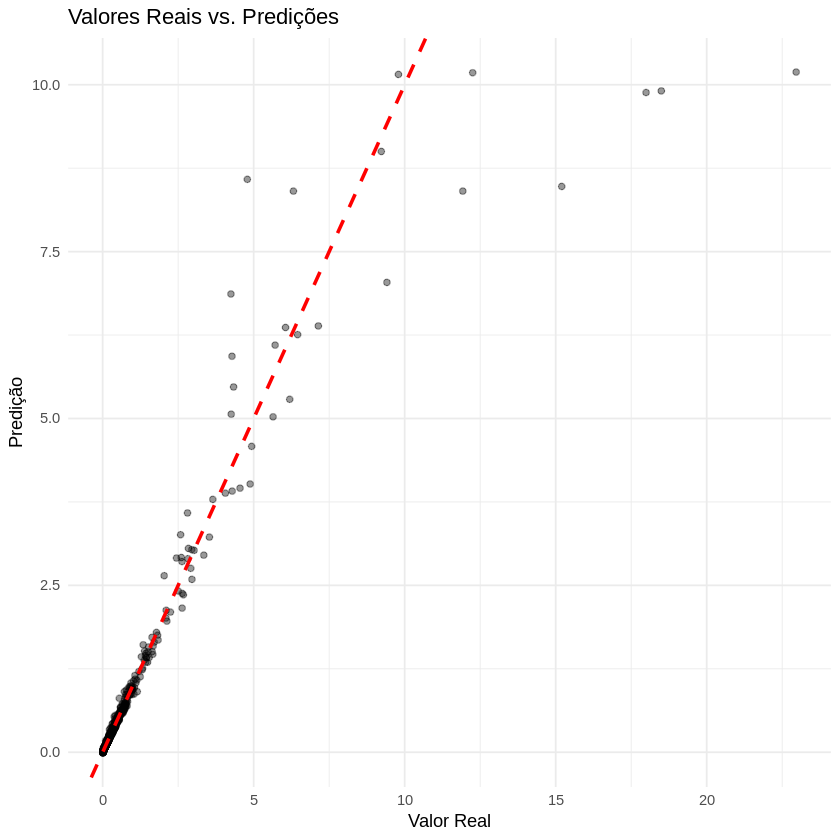

[1] TRUE

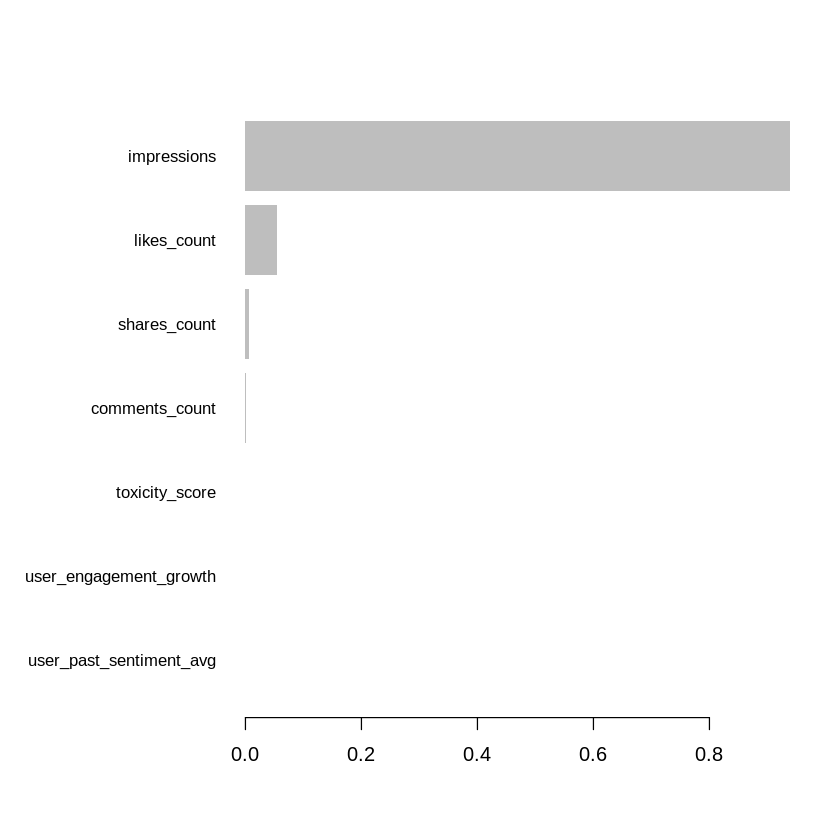

In [ ]:
#atribuicao  Codificação de variáveis categóricas usando one-hot encoding
categorl_cols <- c('day_of_week', 'platform', 'language', 'topic_category',
                     'sentiment_label', 'brand_name', 'campaign_phase')

# Em R usamos model.matrix para one-hot encoding
df_encoded <- cbind(
  df %>% select(-all_of(categorical_cols)),
  as.data.frame(model.matrix(~ . - 1, data = df %>% select(all_of(categorical_cols))))
)

# Processamento de texto (TF-IDF) - Opcional, dependendo se você vai usar
# features de texto no modelo
it_train <- itoken(df$text_content,
                  preprocessor = tolower,
                  tokenizer = word_tokenizer)

vocab <- create_vocabulary(it_train)
vectorizer <- vocab_vectorizer(vocab)
dtm_tfidf <- create_dtm(it_train, vectorizer)
tfidf <- TfIdf$new()
dtm_tfidf_matrix <- fit_transform(dtm_tfidf, tfidf)

# Preparando dados para modelagem
X <- df %>%
  select(likes_count, shares_count, comments_count, impressions,
         sentiment_score, toxicity_score, user_past_sentiment_avg,
         user_engagement_growth)

y <- df$engagement_rate

# Divisão em treino e teste
set.seed(42)
train_indices <- createDataPartition(y, p = 0.8, list = FALSE)
X_train <- X[train_indices, ]
X_test <- X[-train_indices, ]
y_train <- y[train_indices]
y_test <- y[-train_indices]

# ===== USANDO CARET PARA GRID SEARCH =====
# Converter para formato de treino do caret
train_data <- as.data.frame(X_train)
train_data$engagement_rate <- y_train

# Definir grid de parâmetros
xgb_grid <- expand.grid(
  nrounds = c(400, 500, 600),
  max_depth = c(4, 5, 6),
  eta = c(0.01, 0.015),
  gamma = 0,
  colsample_bytree = 1,
  min_child_weight = 1,
  subsample = 1
)

# Configurar controle de treino
control <- trainControl(
  method = "cv",
  number = 5,
  verboseIter = FALSE,
  allowParallel = TRUE
)

# Executar grid search
set.seed(42)
xgb_tune <- train(
  engagement_rate ~ .,
  data = train_data,
  method = "xgbTree",
  trControl = control,
  tuneGrid = xgb_grid,
  verbose = FALSE
)

# Exibir os melhores parâmetros
print(xgb_tune$bestTune)

# Extrair os melhores parâmetros para uso posterior
best_params <- list(
  max_depth = xgb_tune$bestTune$max_depth,
  eta = xgb_tune$bestTune$eta,
  nrounds = xgb_tune$bestTune$nrounds
)

# Visualizar resultados do tuning
plot(xgb_tune)

# Treinar modelo final com os melhores parâmetros
# Usar o modelo do caret diretamente
final_model <- xgb_tune$finalModel

# Ou treinar um modelo XGBoost com os melhores parâmetros
dtrain <- xgb.DMatrix(data = as.matrix(X_train), label = y_train)
dtest <- xgb.DMatrix(data = as.matrix(X_test), label = y_test)

xgb_model <- xgb.train(
  params = list(
    objective = "reg:squaredlogerror",
    max_depth = best_params$max_depth,
    eta = best_params$eta
  ),
  data = dtrain,
  nrounds = best_params$nrounds
)

# Realizar predições
predictions <- predict(xgb_model, dtest)

# Métricas de avaliação
mse <- mean((y_test - predictions)^2)
rmse <- sqrt(mse)
r2 <- 1 - sum((y_test - predictions)^2) / sum((y_test - mean(y_test))^2)
rmsle <- sqrt(mean((log1p(pmax(0, y_test)) - log1p(pmax(0, predictions)))^2))

cat("MSE:  ", round(mse, 4), "\n",
    "RMSE: ", round(rmse, 4), "\n",
    "R²:   ", round(r2, 4), "\n",
    "RMSLE:", round(rmsle, 4), "\n")

# DataFrame comparativo
df_pred <- data.frame(
  y_true = y_test,
  y_pred = predictions,
  residuo = y_test - predictions,
  erro_rel = (y_test - predictions) / abs(y_test)
)
head(df_pred)

# Plot predições vs reais
ggplot(df_pred, aes(x = y_true, y = y_pred)) +
  geom_point(alpha = 0.4) +
  geom_abline(intercept = 0, slope = 1, color = "red", linetype = "dashed", size = 1) +
  theme_minimal() +
  labs(
    title = "Valores Reais vs. Predições",
    x = "Valor Real",
    y = "Predição"
  )

# Feature importance
importance_matrix <- xgb.importance(feature_names = colnames(X_train), model = xgb_model)
xgb.plot.importance(importance_matrix, top_n = 10, measure = "Gain")

# Salvar o modelo final
xgb.save(xgb_model, "xgboost_engagement_model.model")